# Skin Lesion Image Dataset Exploration

This notebook is designed to run entirely in Google Colab without requiring local dataset downloads, using Colab's computational resources.


---


**The workflow includes:**


1.   **Dataset Overview**

This project Loads the DermaMNIST+ dataset (224x224 resolution) containing skin lesion images categorized into different classes.

2.   **Data Loading**

- Loads training, validation, and test splits
- Sets random seeds (42) for reproducibility

3. **Dataset Information**

- Displays dataset description, task type, and class information
- Shows the number of images in each data split

4. **Data Visualization:**



*   **Sample Images by Class**
- Two 2x2 plots showing examples from all 7 classes
- First plot: Two examples of class 0, one each from classes 1 and 2
- Second plot: One example each from classes 3, 4, 5, and 6

*  ** Class Distribution**
- Bar chart showing frequency of each class in the training set
- Includes class names as tick labels




In [1]:
!pip install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.5 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=

MedMNIST Dataset Collection - Version: 3.0.2 | Homepage: https://github.com/MedMNIST/MedMNIST/
Loading the DermaMNIST+ dataset at the highest resolution available (224x224) from the MedMNIST dataset collection...


100%|██████████| 1.09G/1.09G [11:45<00:00, 1.55MB/s]


Dataset loaded successfully

Dataset:
The DermaMNIST is based on the HAM10000, a large collection of multi-source
dermatoscopic images of common pigmented skin lesions. The dataset consists of
10,015 dermatoscopic images categorized as 7 different diseases, formulized as a
multi-class classification task. We split the images into training, validation
and test set with a ratio of 7:1:2. The source images of 3×600×450 are resized
into 3×28×28.

Task: multi-class

Number of classes: 7

Class names:
0, 1, 2, 3, 4, 5, 6


Sizes:
- Training set: 7007 images
- Validation set: 1003 images
- Test set: 2005 images

Displaying samples from all classes in plots (class 0 shown twice in first plot):


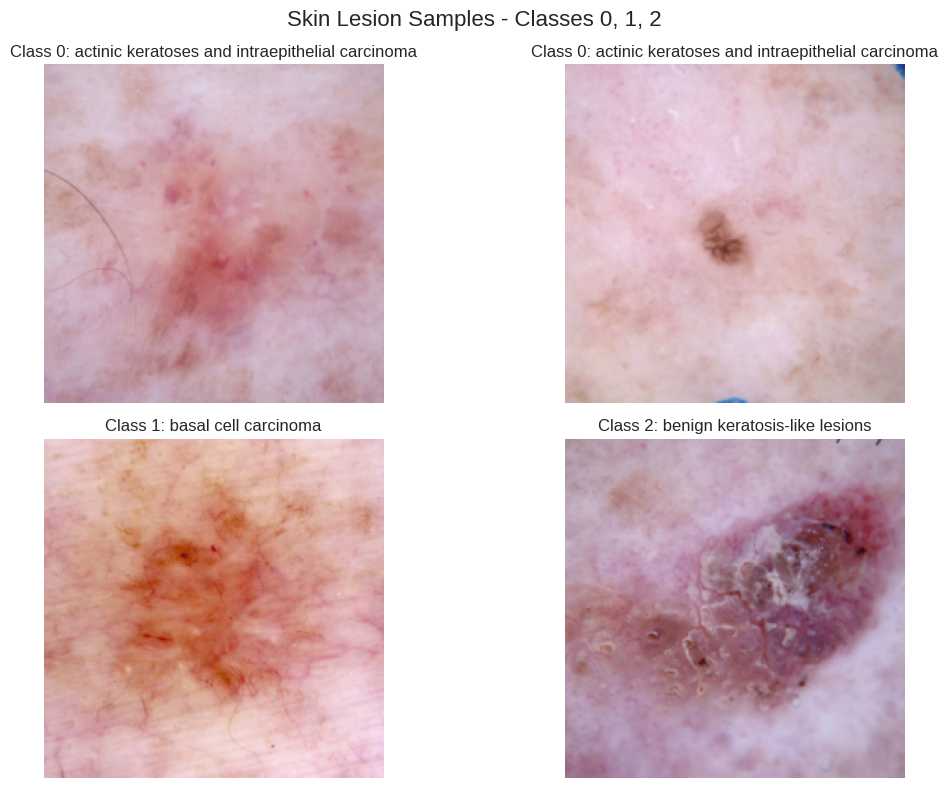

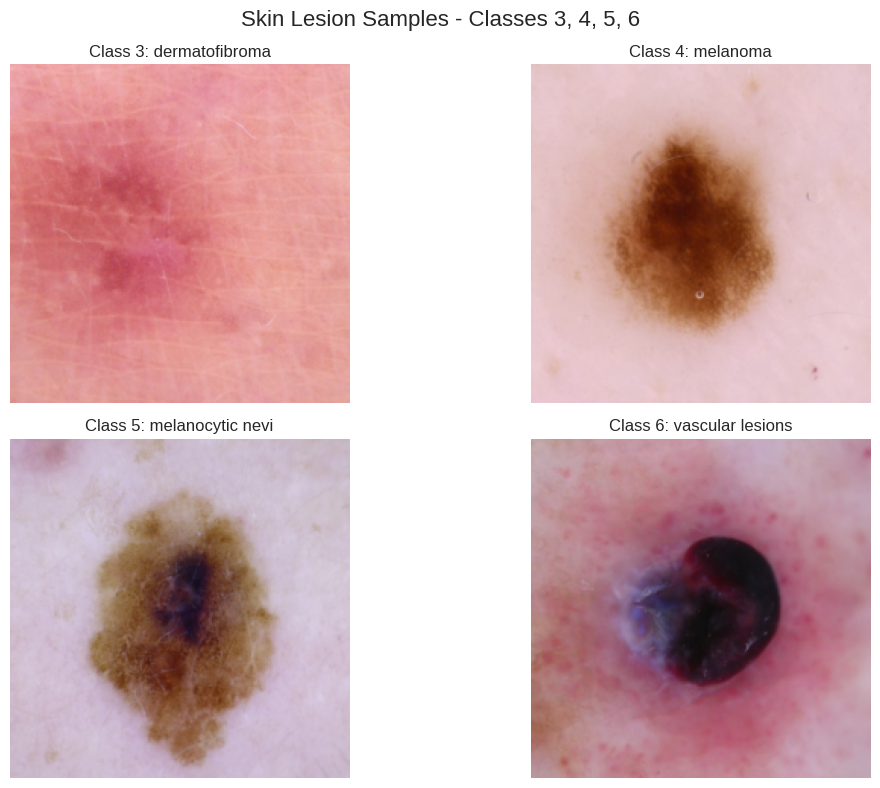


Class distribution in training set:


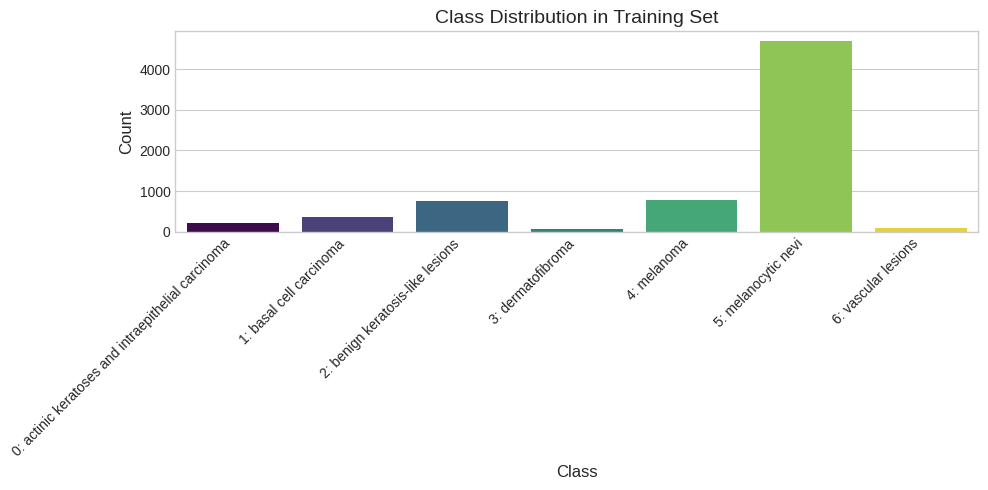

In [2]:
# Import required libraries
import medmnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import textwrap
from medmnist import INFO
from torchvision import transforms
import torch
from torch.utils.data import DataLoader
import random  # Added for consistent randomization
import seaborn as sns  # Added for better visualizations

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# Display MedMNIST version and homepage information
print(f"MedMNIST Dataset Collection - Version: {medmnist.__version__} | Homepage: {medmnist.HOMEPAGE}")

# Download the dermaMNIST+ dataset
# MedMNIST+ offers larger sizes: 64x64, 128x128, and 224x224
# Let's use the highest resolution available (224x224) for better image quality
from medmnist import DermaMNIST

# Load or download datasets for all splits with size 224x224
# Setting download=True only downloads if the dataset doesn't already exist locally
print("Loading the DermaMNIST+ dataset at the highest resolution available (224x224) from the MedMNIST dataset collection...")
train_dataset = DermaMNIST(split='train', download=True, size=224)
val_dataset = DermaMNIST(split='val', download=True, size=224)
test_dataset = DermaMNIST(split='test', download=True, size=224)
print("Dataset loaded successfully")

# Get dataset information
data_info = INFO['dermamnist']

# Wrap long description
wrapped_description = textwrap.fill(data_info['description'], width=80)  # Increased width for better readability

# Wrap class names
class_names = ', '.join(data_info['label'])
wrapped_class_names = textwrap.fill(class_names, width=80)  # Increased width for better readability

print(f"\nDataset:\n{wrapped_description}\n")
print(f"Task: {data_info['task']}\n")
print(f"Number of classes: {len(data_info['label'])}\n")
print(f"Class names:\n{wrapped_class_names}\n")

# Display dataset sizes
print(f"\nSizes:")
print(f"- Training set: {len(train_dataset)} images")
print(f"- Validation set: {len(val_dataset)} images")
print(f"- Test set: {len(test_dataset)} images")

# Set a better style for plots
plt.style.use('seaborn-v0_8-whitegrid')  # Modern, clean style for plots

# Create a function to show specific classes in two 2x2 plots
def show_all_classes(dataset, data_info, figsize=(12, 8)):  # Moderate figure size
    """
    Display samples from classes in two 2x2 plots:
    - First plot: two images from class 0, one from class 1, one from class 2
    - Second plot: one image from each of classes 3, 4, 5, 6
    """
    # Create a dictionary to store image indices for each class
    class_indices = {}

    # Find example images for each class
    for idx in range(len(dataset)):
        _, label = dataset[idx]
        label_idx = label[0].item()
        if label_idx not in class_indices:
            class_indices[label_idx] = []
        class_indices[label_idx].append(idx)

    # First 2x2 plot: Show two class 0 images, one class 1, and one class 2
    fig1, axes1 = plt.subplots(2, 2, figsize=figsize)
    fig1.set_size_inches(figsize)  # Explicitly set size
    fig1.suptitle('Skin Lesion Samples - Classes 0, 1, 2', fontsize=16)  # Added title
    axes1 = axes1.flatten()

    # Get two different images for class 0
    class0_samples = np.random.choice(class_indices[0], 2, replace=False) if len(class_indices[0]) >= 2 else class_indices[0]

    # Plot two images from class 0
    for i in range(len(class0_samples)):
        img, _ = dataset[class0_samples[i]]
        axes1[i].imshow(img)
        axes1[i].set_title(f"Class 0: {data_info['label']['0']}", fontsize=12)
        axes1[i].axis('off')

    # Plot one image from class 1
    if 1 in class_indices and class_indices[1]:
        img_idx = np.random.choice(class_indices[1], 1)[0]
        img, _ = dataset[img_idx]
        axes1[2].imshow(img)
        axes1[2].set_title(f"Class 1: {data_info['label']['1']}", fontsize=12)
        axes1[2].axis('off')

    # Plot one image from class 2
    if 2 in class_indices and class_indices[2]:
        img_idx = np.random.choice(class_indices[2], 1)[0]
        img, _ = dataset[img_idx]
        axes1[3].imshow(img)
        axes1[3].set_title(f"Class 2: {data_info['label']['2']}", fontsize=12)
        axes1[3].axis('off')

    plt.tight_layout()
    plt.show()

    # Second 2x2 plot: Show classes 3, 4, 5, 6
    fig2, axes2 = plt.subplots(2, 2, figsize=figsize)
    fig2.set_size_inches(figsize)  # Explicitly set size
    fig2.suptitle('Skin Lesion Samples - Classes 3, 4, 5, 6', fontsize=16)  # Added title
    axes2 = axes2.flatten()

    # Plot one image from each class 3, 4, 5, 6
    for i, class_idx in enumerate(range(3, 7)):
        if class_idx in class_indices and class_indices[class_idx]:
            img_idx = np.random.choice(class_indices[class_idx], 1)[0]
            img, _ = dataset[img_idx]
            axes2[i].imshow(img)
            axes2[i].set_title(f"Class {class_idx}: {data_info['label'][str(class_idx)]}", fontsize=12)
            axes2[i].axis('off')

    plt.tight_layout()
    plt.show()

# Show samples from all classes with class 0 shown twice
print("\nDisplaying samples from all classes in plots (class 0 shown twice in first plot):")
show_all_classes(train_dataset, data_info)

# Add class distribution visualization
print("\nClass distribution in training set:")
train_labels = [label[0].item() for _, label in [train_dataset[i] for i in range(len(train_dataset))]]
plt.figure(figsize=(10, 5))
# Fix the seaborn warning by using hue instead of palette directly
ax = sns.countplot(x=train_labels, hue=train_labels, palette='viridis', legend=False)
plt.title('Class Distribution in Training Set', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
# Add class names as tick labels
plt.xticks(range(len(data_info['label'])), [f"{i}: {data_info['label'][str(i)]}" for i in range(len(data_info['label']))], rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [3]:
# Print all class labels and their names
print("Class labels and names:")
for idx, name in data_info['label'].items():
    print(f"Class {idx}: {name}")


Class labels and names:
Class 0: actinic keratoses and intraepithelial carcinoma
Class 1: basal cell carcinoma
Class 2: benign keratosis-like lesions
Class 3: dermatofibroma
Class 4: melanoma
Class 5: melanocytic nevi
Class 6: vascular lesions
